In [28]:
keywords = ["bias", "discrimination", "fairness", "algorithm bias" , \
            "algorithm discrimination" , "algorithm regulations", \
            "accountability", "transparency", "reliability", "safety", \
            "privacy", "security", "inclusiveness", "responsible AI", "machine learning", "ai"]

In [29]:
keywordsMentioned = ["bias", "discrimination", "fairness", "algorithm", "algorithmic bias" , "AI", "artificial intelligence" \
            "algorithmic discrimination" , "algorithm regulations", "machine learning", "ML", \
            "inclusive", "diverse", "diversity"]

In [30]:
keywords = ["bias", "discrimination gov", "fairness", "algorithm bias gov" , \
            "algorithm discrimination gov" , "algorithm regulations gov", \
            "accountability", "transparency", "reliability", "safety", \
            "privacy", "security", "inclusiveness", "responsible AI", "machine learning gov", "ai gov"]

In [31]:
keywordsMentioned = ["bias", "discrimination", "fairness", "algorithm", "algorithmic bias" , "AI", "artificial intelligence" \
            "algorithmic discrimination" , "algorithm regulations", "machine learning", "ML", \
            "inclusive", "diverse", "diversity"]

In [32]:
# Import the beautifulsoup and request libraries of python.
import requests
import bs4

allUrls=[]
for text in keywords:
# Make two strings with default google search URL
# 'https://google.com/search?q=' and
# our customized search keyword.
# Concatenate them
  url = 'https://google.com/search?q=' + text
    

  # Fetch the URL data using requests.get(url),
  # store it in a variable, request_result.
  request_result=requests.get( url )
    

  # Creating soup from the fetched request
  soup = bs4.BeautifulSoup(request_result.text,
                          "html.parser")
  

  # soup.find.all( h3 ) to grab 
  
  
  # Iterate through the object 
  # and print it as a string.
  for a in soup.find_all('a', href=True):
    allUrls.append((text, a['href']))
 
  # print(allUrls)

In [33]:
# print(allUrls)

In [34]:
import re 

filteredUrls = []

#filter url results
def filter(urls):
  filteredURLS = []
  for keyword,url in urls:
    if (re.search("(.)*(\.gov)(.)*", url)) and not (re.search("(.)*(\.uk/)(.)*", url)):
      if not (re.search("(.)*(imgres)(.)*", url)):
        filteredURLS.append((keyword,url))
  return filteredURLS

filteredUrls = filter(allUrls)

finalUrls=[]
for keyword,i in filteredUrls:
  i = i.split("&sa=")[0]
  finalUrls.append((keyword,i[7:]))
  #run algorithm here

print(len(finalUrls))


74


In [35]:
import re
# Count keyword in string 
def dictionary_frequency(text, keywords, url, query):
  wordcount=dict.fromkeys(keywords,0)
  for line in text.splitlines():
    line = line.lower()
    for keyword in keywords:
      wordcount[keyword] += len(re.findall(keyword, line))
  return [query, url, wordcount]

In [36]:
import urllib.request 
# Adding score variable and parsing text in website
final_results = []
score = 0
for query, url in finalUrls:
  page = requests.get(url)
  soup = bs4.BeautifulSoup(page.content, "html.parser")
  freq = dictionary_frequency(soup.get_text(), keywordsMentioned, url, query)
  final_results.append(freq + [score])
  # print(freq + [score])

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


MissingSchema: Invalid URL '?ie=UTF-8&q=regulations.gov+api': No scheme supplied. Perhaps you meant http://?ie=UTF-8&q=regulations.gov+api?

In [ ]:
def scoring_function(results):
  return sum(results[2].values())

In [ ]:
for site in final_results:
  site[3] = scoring_function(site)

In [ ]:
def sort_by_relevance(unsorted_list): # sort based on second element
  unsorted_list.sort(key=lambda x: x[3])
  unsorted_list.reverse()

In [ ]:
sort_by_relevance(final_results)

['algorithm discrimination gov', 'https://www.whitehouse.gov/ostp/ai-bill-of-rights/algorithmic-discrimination-protections-2/', {'bias': 34, 'discrimination': 46, 'fairness': 0, 'algorithm': 68, 'algorithmic bias': 3, 'AI': 0, 'artificial intelligencealgorithmic discrimination': 0, 'algorithm regulations': 0, 'machine learning': 0, 'ML': 0, 'inclusive': 2, 'diverse': 1, 'diversity': 0}, 154]


['algorithm discrimination gov', 'https://oag.dc.gov/release/ag-racine-introduces-legislation-stop', {'bias': 19, 'discrimination': 39, 'fairness': 1, 'algorithm': 76, 'algorithmic bias': 6, 'AI': 0, 'artificial intelligencealgorithmic discrimination': 0, 'algorithm regulations': 0, 'machine learning': 1, 'ML': 0, 'inclusive': 1, 'diverse': 0, 'diversity': 0}, 143]


['algorithm discrimination gov', 'https://www.eeoc.gov/laws/guidance/americans-disabilities-act-and-use-software-algorithms-and-artificial-intelligence', {'bias': 6, 'discrimination': 26, 'fairness': 0, 'algorithm': 68, 'algorithmic 

In [ ]:
import pandas as pd 
df = pd.DataFrame(final_results, columns =['Query', 'URL', 'FreqDict', 'Score'])
df

,Query,URL,FreqDict,Score
0,algorithm discrimination gov,https://www.whitehouse.gov/ostp/ai-bill-of-rig...,"{'bias': 34, 'discrimination': 46, 'fairness':...",154
1,algorithm discrimination gov,https://oag.dc.gov/release/ag-racine-introduce...,"{'bias': 19, 'discrimination': 39, 'fairness':...",143
2,algorithm discrimination gov,https://www.eeoc.gov/laws/guidance/americans-d...,"{'bias': 6, 'discrimination': 26, 'fairness': ...",102
3,algorithm regulations gov,https://www.markey.senate.gov/news/press-relea...,"{'bias': 7, 'discrimination': 11, 'fairness': ...",74
4,algorithm discrimination gov,https://www.markey.senate.gov/news/press-relea...,"{'bias': 7, 'discrimination': 11, 'fairness': ...",74
5,machine learning gov,https://www.energy.gov/science/doe-explainsmac...,"{'bias': 1, 'discrimination': 0, 'fairness': 0...",46
6,discrimination gov,https://www.cdc.gov/eeo/faqs/discrimination.htm,"{'bias': 0, 'discrimination': 44, 'fairness': ...",44
7,machine learning gov,https://www.fda.gov/medical-devices/software-m...,"{'bias': 0, 'discrimination': 0, 'fairness': 0...",42
8,algorithm bias gov,https://www.nist.gov/news-events/news/2022/03/...,"{'bias': 37, 'discrimination': 0, 'fairness': ...",40
9,algorithm discrimination gov,https://www.ftc.gov/business-guidance/blog/202...,"{'bias': 10, 'discrimination': 5, 'fairness': ...",39


In [ ]:
# Score per group
groups_score = df.groupby(by=["Query"]).sum()
groups_score

,Score
Query,
ai gov,6
algorithm bias gov,51
algorithm discrimination gov,582
algorithm regulations gov,175
discrimination gov,264
machine learning gov,138
safety,2
security,4
transparency,7


In [ ]:
# df['Query'].value_counts()

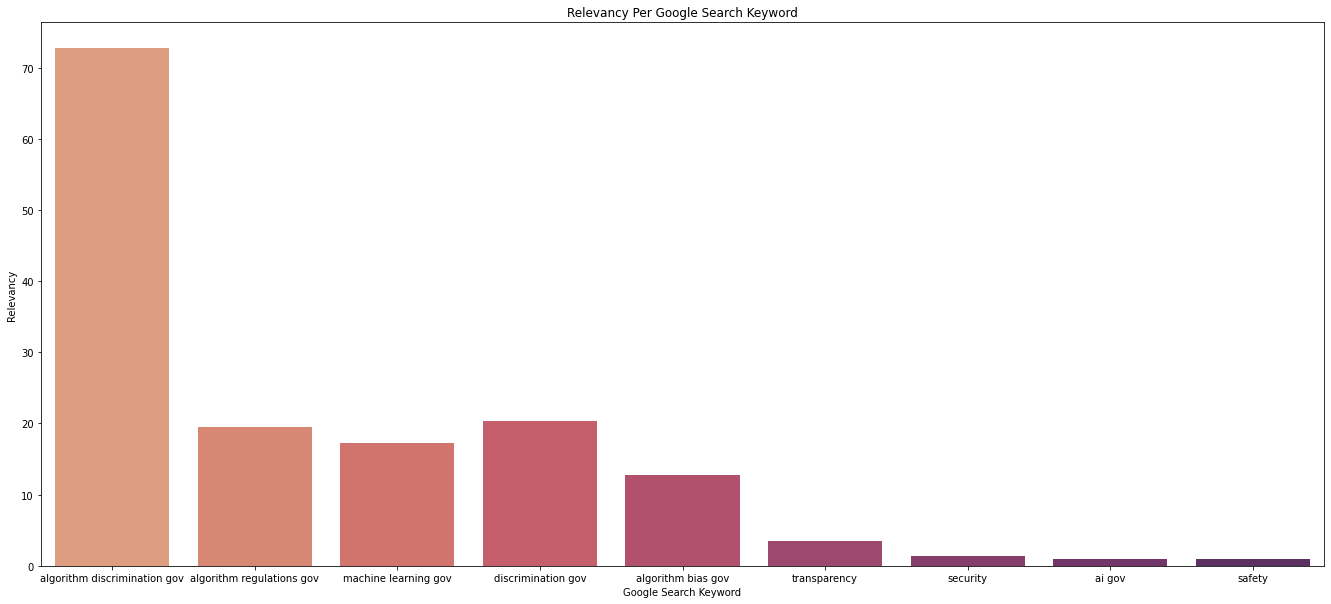

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

def colChart(dataFrame):
  plt.figure(figsize=(23,10))
  plt_g = sns.barplot(data=dataFrame, x="Query", y="Score", palette = "flare", ci=None)
  plt_g.set(xlabel = "Google Search Keyword", ylabel = "Relevancy", title = "Relevancy Per Google Search Keyword")

colChart(df)

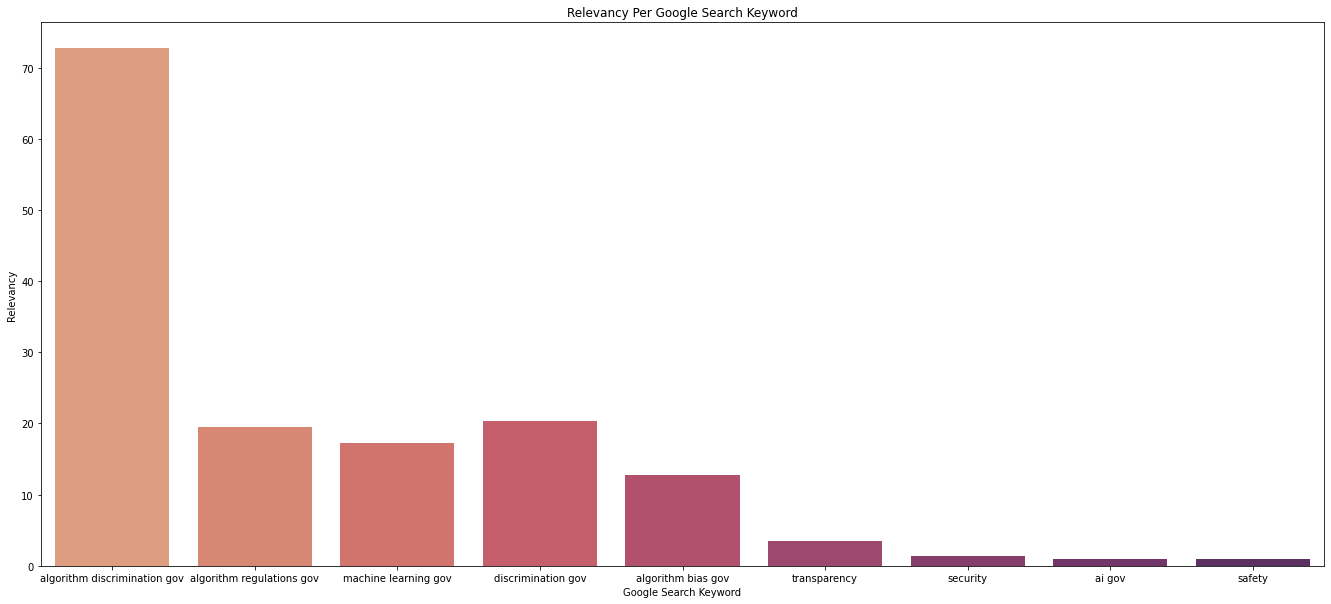

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

def colChart(dataFrame):
  plt.figure(figsize=(23,10))
  plt_g = sns.barplot(data=dataFrame, x="Query", y="Score", palette = "flare", ci=None)
  plt_g.set(xlabel = "Google Search Keyword", ylabel = "Relevancy", title = "Relevancy Per Google Search Keyword")

colChart(df)